In [56]:
import numpy as np
import pandas as pd

In [57]:
df=pd.read_csv(r"D:\PycharmProjects\pythonProject\ML_LAB\LAB_1\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [58]:
nonnumerical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for feature in nonnumerical:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'yes' else 0)

df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'furnished'  else (0 if x == 'semifurnished' else -1))

print(df.head())
print(df.info())
print(df.columns)
area_mean=df['area'].mean()
price_mean=df['price'].mean()
area_std=df['area'].std()
price_std=df['price'].std()
X= df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']].values

y_actual =df['price'].values

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                -1  
3                 1  
4                 1  
<class 'pandas.core.frame.

In [59]:
price_mean=df['price'].mean()
price_std=df['price'].std()
area_mean=df['area'].mean()
area_std=df['area'].std()

In [60]:
price_mean

np.float64(4766729.247706422)

In [61]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,-1
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1


In [62]:
X['area']=(X['area']-area_mean)/area_std
X.head()

C:\Users\RAJKUMAR BOKKISAM\AppData\Local\Temp\ipykernel_17428\2135561447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['area']=(X['area']-area_mean)/area_std


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.045766,4,2,3,1,0,0,0,1,2,1,1
1,1.755397,4,4,4,1,0,0,0,1,3,0,1
2,2.216196,3,2,2,1,0,1,0,0,2,1,-1
3,1.082630,4,2,2,1,0,1,0,1,3,1,1
4,1.045766,4,1,2,1,1,1,0,1,2,0,1


In [63]:
X['area'].min()

np.float64(-1.6130478379496513)

In [64]:
X['area'].max()

np.float64(5.091585570242134)

In [65]:
Y=(df['price']-price_mean)/price_std
#y_actual=Y.values()
Y[:10]
y_actual=Y.values

In [66]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
print(X[:4])

[[ 1.          1.04576555  4.          2.          3.          1.
   0.          0.          0.          1.          2.          1.
   1.        ]
 [ 1.          1.75539685  4.          4.          4.          1.
   0.          0.          0.          1.          3.          0.
   1.        ]
 [ 1.          2.2161964   3.          2.          2.          1.
   0.          1.          0.          0.          2.          1.
  -1.        ]
 [ 1.          1.08262951  4.          2.          2.          1.
   0.          1.          0.          1.          3.          1.
   1.        ]]


In [67]:
weights =np.random.rand(X.shape[1]).reshape(-1,1)
weights

array([[0.37666619],
       [0.21183944],
       [0.57178167],
       [0.678085  ],
       [0.40920218],
       [0.19969743],
       [0.3966592 ],
       [0.45071651],
       [0.89663885],
       [0.74593156],
       [0.07813944],
       [0.57476768],
       [0.20420071]])

In [68]:
def y_predict(X, weights):
    return X @ weights
y_predicted = y_predict(X, weights)
print(y_predicted.shape)

#print(y_predicted)
"""def mse_loss(y_actual, y_predicted):
    return np.mean((y_actual.reshape(-1,1) - y_predicted) ** 2)"""
def mse_loss(Y_actual,weights):
    Y_predict=y_predict(X,weights)
    return np.mean((Y_actual-Y_predict)**2)
print(mse_loss(y_actual,weights))


"""def grad_weights(x, y_actual, weights):
    y_predicted = y_predict(x, weights).reshape(1, -1)
    return -2/(len(y_actual))*(y_actual-y_predicted)@x"""
"""def grad_weights(lis,weights):
    gradients=np.sum((((y_actual[lis]-y_predict(X[lis],weights)).reshape(1,len(lis))*-1/len(lis)*2)@X[lis]),axis=0)
    return gradients.reshape(-1,1)"""

def grad_weights(X_batch, y_batch, weights):
    y_batch = y_batch.reshape(-1,1)
    preds = X_batch @ weights
    errors = y_batch - preds
    gradients = (-2 / len(y_batch)) * (X_batch.T @ errors)
    return gradients




(545, 1)
22.529025188772703


In [69]:
def mini_batch_gradient_descent(X, y_actual, weights, learning_rate=0.001):
        indexes= np.arange(len(y_actual))
        np.random.shuffle(indexes)
        batches= indexes.reshape(-1, 5)
        for batch in batches:
            X_shuffled = X[batch]
            y_actual_shuffled = y_actual[batch]
            gradients = weight_gradients(X_shuffled, y_actual_shuffled, weights)
            weights -= learning_rate * gradients.T

In [70]:
import numpy as np

# SGD
def min_batch_grad_descent_sgd(X, batch_size, Y_actual, weights, learning_rate=0.01):
    indexes = np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches = indexes.reshape(-1, batch_size)
    for batch in batches:
        X_batch = X[batch]
        Y_batch = Y_actual[batch]
        weights -= learning_rate * grad_weights(X_batch, Y_batch, weights)
    return weights


# Momentum
def min_batch_grad_descent_mom(X, batch_size, Y_actual, weights, learning_rate=0.01, gamma=0.9, velocity=None):
    if velocity is None:
        velocity = np.zeros_like(weights)
    indexes = np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches = indexes.reshape(-1, batch_size)
    for batch in batches:
        X_batch = X[batch]
        Y_batch = Y_actual[batch]
        grad = grad_weights(X_batch, Y_batch, weights)
        velocity = gamma * velocity + learning_rate * grad
        weights = weights - velocity
    return weights, velocity


# NAG
def min_batch_grad_descent_nag(X, batch_size, Y_actual, weights, learning_rate=0.01, gamma=0.9, velocity=None):
    if velocity is None:
        velocity = np.zeros_like(weights)
    indexes = np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches = indexes.reshape(-1, batch_size)
    for batch in batches:
        X_batch = X[batch]
        Y_batch = Y_actual[batch]
        lookahead = weights - gamma * velocity
        grad = grad_weights(X_batch, Y_batch, lookahead)
        velocity = gamma * velocity + learning_rate * grad
        weights = weights - velocity
    return weights, velocity


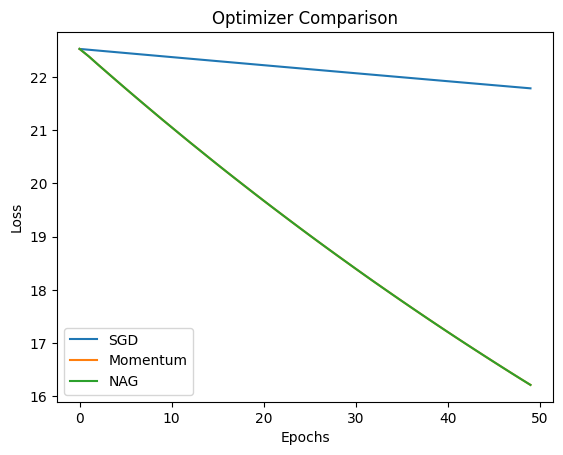

In [71]:
import matplotlib.pyplot as plt

epochs = 50
batch_size = 5

# --- SGD ---
w_sgd = weights.copy()
losses_sgd = []
for i in range(epochs):
    loss = mse_loss(y_actual,w_sgd)
    losses_sgd.append(loss)
    w_sgd = min_batch_grad_descent_sgd(X,batch_size,y_actual,w_sgd,learning_rate=0.0000001)

# --- Momentum ---
w_mom = weights.copy()
vel_mom = np.zeros_like(weights)
losses_mom = []
for i in range(epochs):
    loss = mse_loss(y_actual,w_mom)
    losses_mom.append(loss)
    w_mom, vel_mom = min_batch_grad_descent_mom(X,batch_size,y_actual,w_mom,learning_rate=0.0000001,gamma=0.9,velocity=vel_mom)

# --- NAG ---
w_nag = weights.copy()
vel_nag = np.zeros_like(weights)
losses_nag = []
for i in range(epochs):
    loss = mse_loss(y_actual,w_nag)
    losses_nag.append(loss)
    w_nag, vel_nag = min_batch_grad_descent_nag(X,batch_size,y_actual,w_nag,learning_rate=0.0000001,gamma=0.9,velocity=vel_nag)

# --- Plot ---
plt.plot(losses_sgd,label="SGD")
plt.plot(losses_mom,label="Momentum")
plt.plot(losses_nag,label="NAG")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Optimizer Comparison")
plt.show()
